In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_provider = pd.read_csv("Medicare_Provider_Charge_Inpatient_FY2016.csv")
df = pd.read_csv("Resources/2016_statedata.csv")

#print(df["Provider State"].nunique())
      
#df.count()
df.columns
#df['DRG Definition'].nunique()
#df['DRG Definition'].unique()
df


,DRG Definition,Provider State,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,AL,14,"$962,498.36","$284,914.79","$148,511.00"
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,CO,17,"$1,153,214.53","$263,056.94","$204,396.41"
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,IA,17,"$758,456.82","$205,891.47","$201,847.06"
3,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,MD,20,"$335,844.25","$309,431.50","$306,840.80"
4,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,OR,20,"$510,127.25","$252,960.50","$241,896.90"
5,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,UT,22,"$558,364.50","$230,003.36","$198,987.77"
6,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,WI,23,"$612,182.13","$231,920.48","$169,567.13"
7,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,SC,24,"$815,351.00","$209,670.08","$197,363.38"
8,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,DC,31,"$859,521.77","$220,607.68","$209,261.97"
9,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,CT,32,"$772,939.25","$237,241.13","$227,239.88"


In [19]:

df_renamed = df.rename(columns={'DRG Definition':'Diagnosis',
                               'Provider State':'State',
                               ' Total Discharges ':'Total Discharges'})
#by_state = df_renamed.groupby(['State','Diagnosis'])


#average_dollars = by_state[['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']].mean()
# average_dollars

#by_state.count().head(20)

#list of selected diagnosis
diag_list = ['293 - HEART FAILURE & SHOCK W/O CC/MCC','292 - HEART FAILURE & SHOCK W CC','194 - SIMPLE PNEUMONIA & PLEURISY W CC','684 - RENAL FAILURE W/O CC/MCC','699 - OTHER KIDNEY & URINARY TRACT DIAGNOSES W CC']
#diag_list = ['203 - BRONCHITIS & ASTHMA W/O CC/MCC']
#diag_list = ['699 - OTHER KIDNEY & URINARY TRACT DIAGNOSES W CC']
#diag_list
df_renamed.columns
#df_renamed_value.head()
#type(df_renamed_value.iloc[0,9])

Index(['Diagnosis', 'State', 'Total Discharges', 'Average Covered Charges',
       'Average Total Payments', 'Average Medicare Payments'],
      dtype='object')

In [23]:
#total_discharges = by_state[" Total Discharges "].sum()
#total_discharges
#df_renamed_value = df_renamed.loc[df_renamed.Diagnosis.isin(['293 - HEART FAILURE & SHOCK W/O CC/MCC','292 - HEART FAILURE & SHOCK W CC','194 - SIMPLE PNEUMONIA & PLEURISY W CC','684 - RENAL FAILURE W/O CC/MCC','699 - OTHER KIDNEY & URINARY TRACT DIAGNOSES W CC'])]
df_renamed_value = df_renamed[df_renamed.Diagnosis.isin(diag_list)]
df_renamed_value

# '293 - HEART FAILURE & SHOCK W/O CC/MCC',
# '292 - HEART FAILURE & SHOCK W CC',
# '194 - SIMPLE PNEUMONIA & PLEURISY W CC',
# '684 - RENAL FAILURE W/O CC/MCC',
# '699 - OTHER KIDNEY & URINARY TRACT DIAGNOSES W CC'

#Convert Average Provider Charges field to float
if (type(df_renamed_value.iloc[0,2]) == str):
    df_renamed_value['Average Covered Charges'] = df_renamed_value['Average Covered Charges'].str.replace('$','').str.replace(',','')
    df_renamed_value['Average Covered Charges'] = df_renamed_value['Average Covered Charges'].astype(np.float64)
    df_renamed_value['Total Discharges'] = df_renamed_value['Total Discharges'].str.replace(',','')
    df_renamed_value['Total Discharges'] = df_renamed_value['Total Discharges'].astype(np.int64)


# df_renamed_value_grp = df_renamed_value.groupby(['State'])

# df_renamed_value_grp_sum = df_renamed_value_grp['Average Covered Charges'].sum()
# df_renamed_value_grp_sumdf = pd.DataFrame(df_renamed_value_grp_sum)

# df_renamed_value_grp_sumdf.sort_values('Average Covered Charges',ascending=False).head()

#df_renamed_value
#type(df_renamed_value['Average Covered Charges'][0])
#df_renamed_value
#type(df_renamed_value['Average Covered Charges'][0])
#df_renamed_value['Average Covered Charges'].dtype

df_renamed_value

C:\Users\vasud\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\vasud\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\vasud\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,Diagnosis,State,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
5477,194 - SIMPLE PNEUMONIA & PLEURISY W CC,AK,189,31616.39,"$12,111.08","$10,943.80"
5478,194 - SIMPLE PNEUMONIA & PLEURISY W CC,WY,220,18254.50,"$9,150.60","$7,950.86"
5479,194 - SIMPLE PNEUMONIA & PLEURISY W CC,HI,222,25489.82,"$9,963.84","$7,892.34"
5480,194 - SIMPLE PNEUMONIA & PLEURISY W CC,VT,245,13798.22,"$8,282.57","$7,120.70"
5481,194 - SIMPLE PNEUMONIA & PLEURISY W CC,MT,273,16105.85,"$6,660.18","$5,472.50"
5482,194 - SIMPLE PNEUMONIA & PLEURISY W CC,ID,298,20386.30,"$6,569.81","$5,321.47"
5483,194 - SIMPLE PNEUMONIA & PLEURISY W CC,ND,306,14679.98,"$6,823.13","$5,454.83"
5484,194 - SIMPLE PNEUMONIA & PLEURISY W CC,DC,335,29388.79,"$8,941.61","$6,506.10"
5485,194 - SIMPLE PNEUMONIA & PLEURISY W CC,RI,336,19417.86,"$7,783.49","$6,092.20"
5486,194 - SIMPLE PNEUMONIA & PLEURISY W CC,SD,418,22481.04,"$7,361.65","$6,005.82"


In [24]:
df_by_states = df_renamed_value.loc[(df_renamed_value['State']=='CA') |(df_renamed_value['State']=='FL') |(df_renamed_value['State']=='TX')|(df_renamed_value['State']=='VT')|(df_renamed_value['State']=='ND')]
df_by_states

,Diagnosis,State,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
5480,194 - SIMPLE PNEUMONIA & PLEURISY W CC,VT,245,13798.22,"$8,282.57","$7,120.70"
5483,194 - SIMPLE PNEUMONIA & PLEURISY W CC,ND,306,14679.98,"$6,823.13","$5,454.83"
5525,194 - SIMPLE PNEUMONIA & PLEURISY W CC,CA,8534,53418.45,"$9,179.61","$7,704.66"
5526,194 - SIMPLE PNEUMONIA & PLEURISY W CC,TX,9288,35061.84,"$6,831.16","$5,223.51"
5527,194 - SIMPLE PNEUMONIA & PLEURISY W CC,FL,9833,39439.82,"$6,427.78","$5,094.97"
9052,292 - HEART FAILURE & SHOCK W CC,VT,309,16813.25,"$8,399.18","$7,298.77"
9055,292 - HEART FAILURE & SHOCK W CC,ND,397,15041.73,"$6,618.10","$5,454.17"
9098,292 - HEART FAILURE & SHOCK W CC,CA,11889,54576.74,"$9,539.50","$8,117.23"
9099,292 - HEART FAILURE & SHOCK W CC,TX,12375,34931.28,"$7,027.74","$5,593.12"
9100,292 - HEART FAILURE & SHOCK W CC,FL,13371,36257.01,"$6,375.09","$5,327.80"


#Finding top 5 and bottom 5 states based on Average Covered Charges
df_all_renamed = df_renamed

#df_state_groupdf = pd.DataFrame(df_state_group)
if (type(df_all_renamed['Average Covered Charges'][0]) == str):
    df_all_renamed['Average Covered Charges'] = df_all_renamed['Average Covered Charges'].str.replace('$','').str.replace(',','')
    df_all_renamed['Average Covered Charges'] = df_all_renamed['Average Covered Charges'].astype(np.float64)
    df_all_renamed['Total Discharges'] = df_all_renamed['Total Discharges'].str.replace(',','')
    df_all_renamed['Total Discharges'] = df_all_renamed['Total Discharges'].astype(np.float64)

df_state_group = df_all_renamed.groupby(['State'])
#df_renamed_value_grp_sum = df_state_group['Average Covered Charges'].sum()
df_renamed_value_grp_sum = (df_state_group['Average Covered Charges'].sum())/(df_state_group['Total Discharges'].sum())

df_state_group_sumdf = pd.DataFrame({'ACC_Sum':df_state_group['Average Covered Charges'].sum(),
                                     'TD_Sum':df_state_group['Total Discharges'].sum(),
                                     })
#df_state_group_sumdf.sort_values('Average Covered Charges',ascending=False).head()

# df_all_renamed.columns
#type(df_all_renamed['Average Covered Charges'][0])
#df_state_group_sumdf.head()
#df_all_renamed_convertdtype
df_state_group_sumdf

In [28]:
#Amount Charged by each state for a diagnosis
df_by_states['Per Diagnosis'] = (df_by_states['Average Covered Charges'])/(df_by_states['Total Discharges'])
df_by_states

C:\Users\vasud\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Diagnosis,State,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Per Diagnosis
5480,194 - SIMPLE PNEUMONIA & PLEURISY W CC,VT,245,13798.22,"$8,282.57","$7,120.70",56.319265
5483,194 - SIMPLE PNEUMONIA & PLEURISY W CC,ND,306,14679.98,"$6,823.13","$5,454.83",47.973791
5525,194 - SIMPLE PNEUMONIA & PLEURISY W CC,CA,8534,53418.45,"$9,179.61","$7,704.66",6.259486
5526,194 - SIMPLE PNEUMONIA & PLEURISY W CC,TX,9288,35061.84,"$6,831.16","$5,223.51",3.774961
5527,194 - SIMPLE PNEUMONIA & PLEURISY W CC,FL,9833,39439.82,"$6,427.78","$5,094.97",4.010965
9052,292 - HEART FAILURE & SHOCK W CC,VT,309,16813.25,"$8,399.18","$7,298.77",54.411812
9055,292 - HEART FAILURE & SHOCK W CC,ND,397,15041.73,"$6,618.10","$5,454.17",37.888489
9098,292 - HEART FAILURE & SHOCK W CC,CA,11889,54576.74,"$9,539.50","$8,117.23",4.590524
9099,292 - HEART FAILURE & SHOCK W CC,TX,12375,34931.28,"$7,027.74","$5,593.12",2.822730
9100,292 - HEART FAILURE & SHOCK W CC,FL,13371,36257.01,"$6,375.09","$5,327.80",2.711615


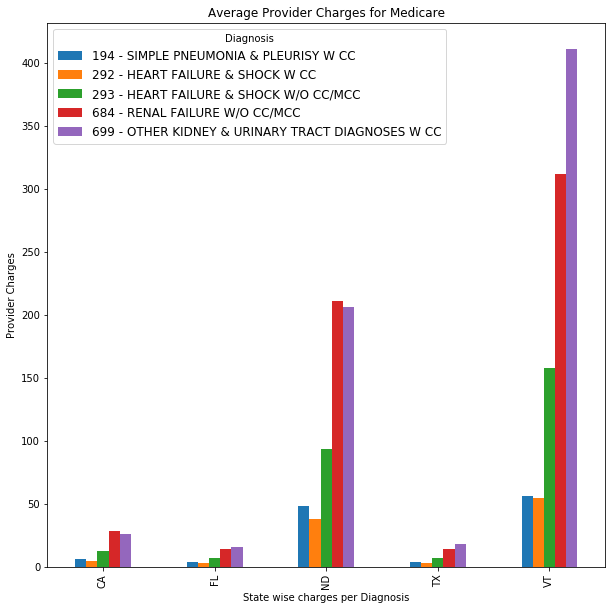

In [39]:
#Plotting graph
df_by_states.pivot("State", "Diagnosis", "Per Diagnosis").plot(kind='bar', figsize=(10,10))

# Give our chart some labels and a tile
plt.title("Average Provider Charges for Medicare")
plt.xlabel("State wise charges per Diagnosis")
plt.ylabel("Provider Charges")

# Create a legend for our chart
plt.legend(loc="best",title='Diagnosis',fontsize=12)

plt.show()

In [42]:
#Different provider charges for a state
df_provider.columns
# by_drg = df.groupby("Diagnosis")

# by_drg.nunique().sort_values(by = ["Provider Id"], ascending = True)

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region (HRR) Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')

In [ ]:
df.head()

In [ ]:
states = df["Provider State"]

all_states = []

for state in states:
    if state not in all_states:
        all_states.append(state)
        


In [ ]:
for state in all_states:
    if df["Provider State"] == state:
        